3.3006890651043186 4.045575819492812 2204.9906085763214


<IPython.core.display.Javascript object>


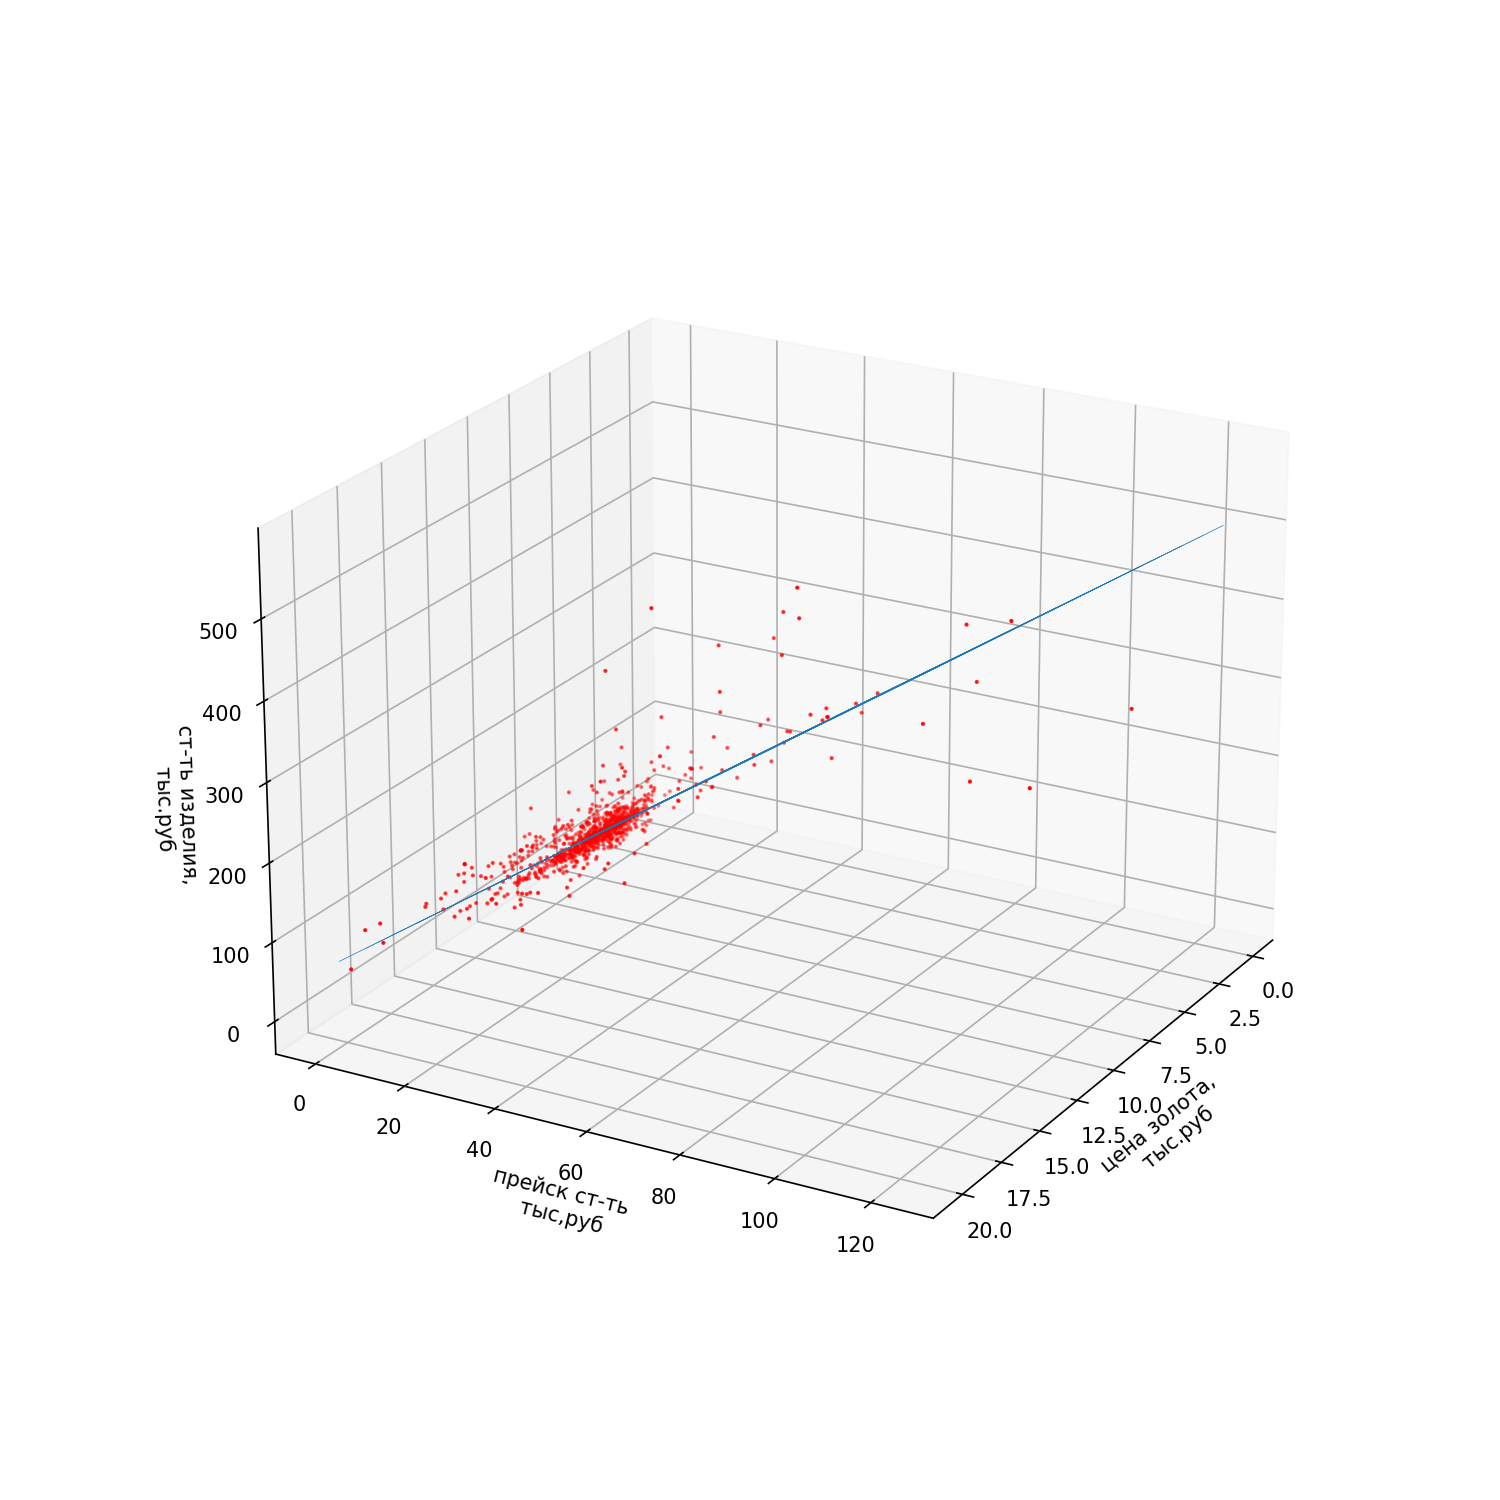

In [39]:
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
from sklearn import linear_model
#%matplotlib inline
%matplotlib notebook
filenamemiuz = 'jewels/miuz/_брилл_суммированы_mius161121_0-3178.xlsx'
raw = pd.read_excel(filenamemiuz,sheet_name=0)
data = raw.loc[(raw.gold.str.contains('585') ),['price','weight','prcost']].loc[(raw.price<500000),:].loc[(raw.prcost<3000),:]
def pricesurf(data):
    #Курс доллара и биржевая цена золота на 03-12-2021
    dollar_rate = 73.66
    gold_rate = 4191.05
    data['prcost_rub'] = data.prcost*dollar_rate
    data['gold_rub'] = data.weight*0.585*gold_rate
    pd.options.display.float_format ="{:.2f}".format
    #нахождение коэффициентов 
    miuz = linear_model.LinearRegression()
    X_train = data.iloc[:,:].loc[:,['gold_rub','prcost_rub']].to_numpy()
    Y_train = data.iloc[:,:].loc[:,'price'].to_numpy()
    miuz.fit(X_train,Y_train)
    A,B = miuz.coef_
    C =  miuz.intercept_
    print(A,B,C)
    #проверка
    data['predict'] = miuz.predict(X_train)
    data['bycoef'] = data.gold_rub*miuz.coef_[0] + data.prcost_rub*miuz.coef_[1]+miuz.intercept_
    data['diff'] = data.predict-data.bycoef
    #построение плоскости
    x_val = np.linspace(0,data.gold_rub.max(),15)# np.arange(0, 20000,5000)
    y_val = np.linspace(0,data.prcost_rub.max(),15)
    xx,yy = np.meshgrid(x_val,y_val)
    zz = A*xx + B*yy + C/1000
    #визуализация
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.plot_wireframe(xx/1000, yy/1000, zz/1000, linewidth = 0.2  )
    ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='red')
    ax.set_xlabel('цена золота, \n тыс.руб')
    ax.set_ylabel('прейск ст-ть \n тыс,руб')
    ax.set_zlabel('ст-ть изделия,\n тыс.руб')
    #ax.plot_surface(xx/1000, yy/1000, zz/1000)
pricesurf(data)

In [ ]:
filename_kdm = 'jewels/kdm/_брилл_суммированы__объединенная_по_jewelssprint2data.xlsx'
raw_kdm = pd.read_excel(filename_kdm,sheet_name=0)

In [25]:
raw_kdm.columns

Index([       'Unnamed: 0',         'index_row',                'пп',
                    'id7c',           'Изделие',           'Артикул',
              'Unnamed: 5',           'НоменГр',             'Проба',
            'Цвет металла',               'Кол',               'Вес',
                   'Закуп',              'Розн',           'Вставки',
                  'Размер', 'РазмернаяГруппаЦК',            'ЦветЦК',
               'ЧистотаЦК',            'Дизайн',         'Поставщик',
                 'Договор',                'ТН',       'Unnamed: 22',
                 'filname',       'Unnamed: 23',       'Unnamed: 24',
             'Unnamed: 25',       'Unnamed: 26',       'Unnamed: 27',
             'Unnamed: 28',       'Unnamed: 29',       'Unnamed: 30',
             'Unnamed: 31',                1.92,          'checklog',
                 'vs_dict',               'gem',              'ШТУК',
                   'КАРАТ',            'prcost',       'Unnamed: 41',
             'Unname

In [41]:
data_kdm = raw_kdm.loc[(raw_kdm.Проба.str.contains('585') ),[ 'Закуп','Вес','prcost']].loc[(raw_kdm.Закуп<250000),:].loc[(raw_kdm.prcost<1000),:]

In [27]:
data_kdm['price'] = data_kdm.Закуп *2*1.20
data_kdm.rename(columns={'Вес':'weight'}, inplace=True)

In [29]:
data_kdm.weight.max()

143.45

1.2973770360384371 3.3394304956360843 4649.4653686141355


<IPython.core.display.Javascript object>


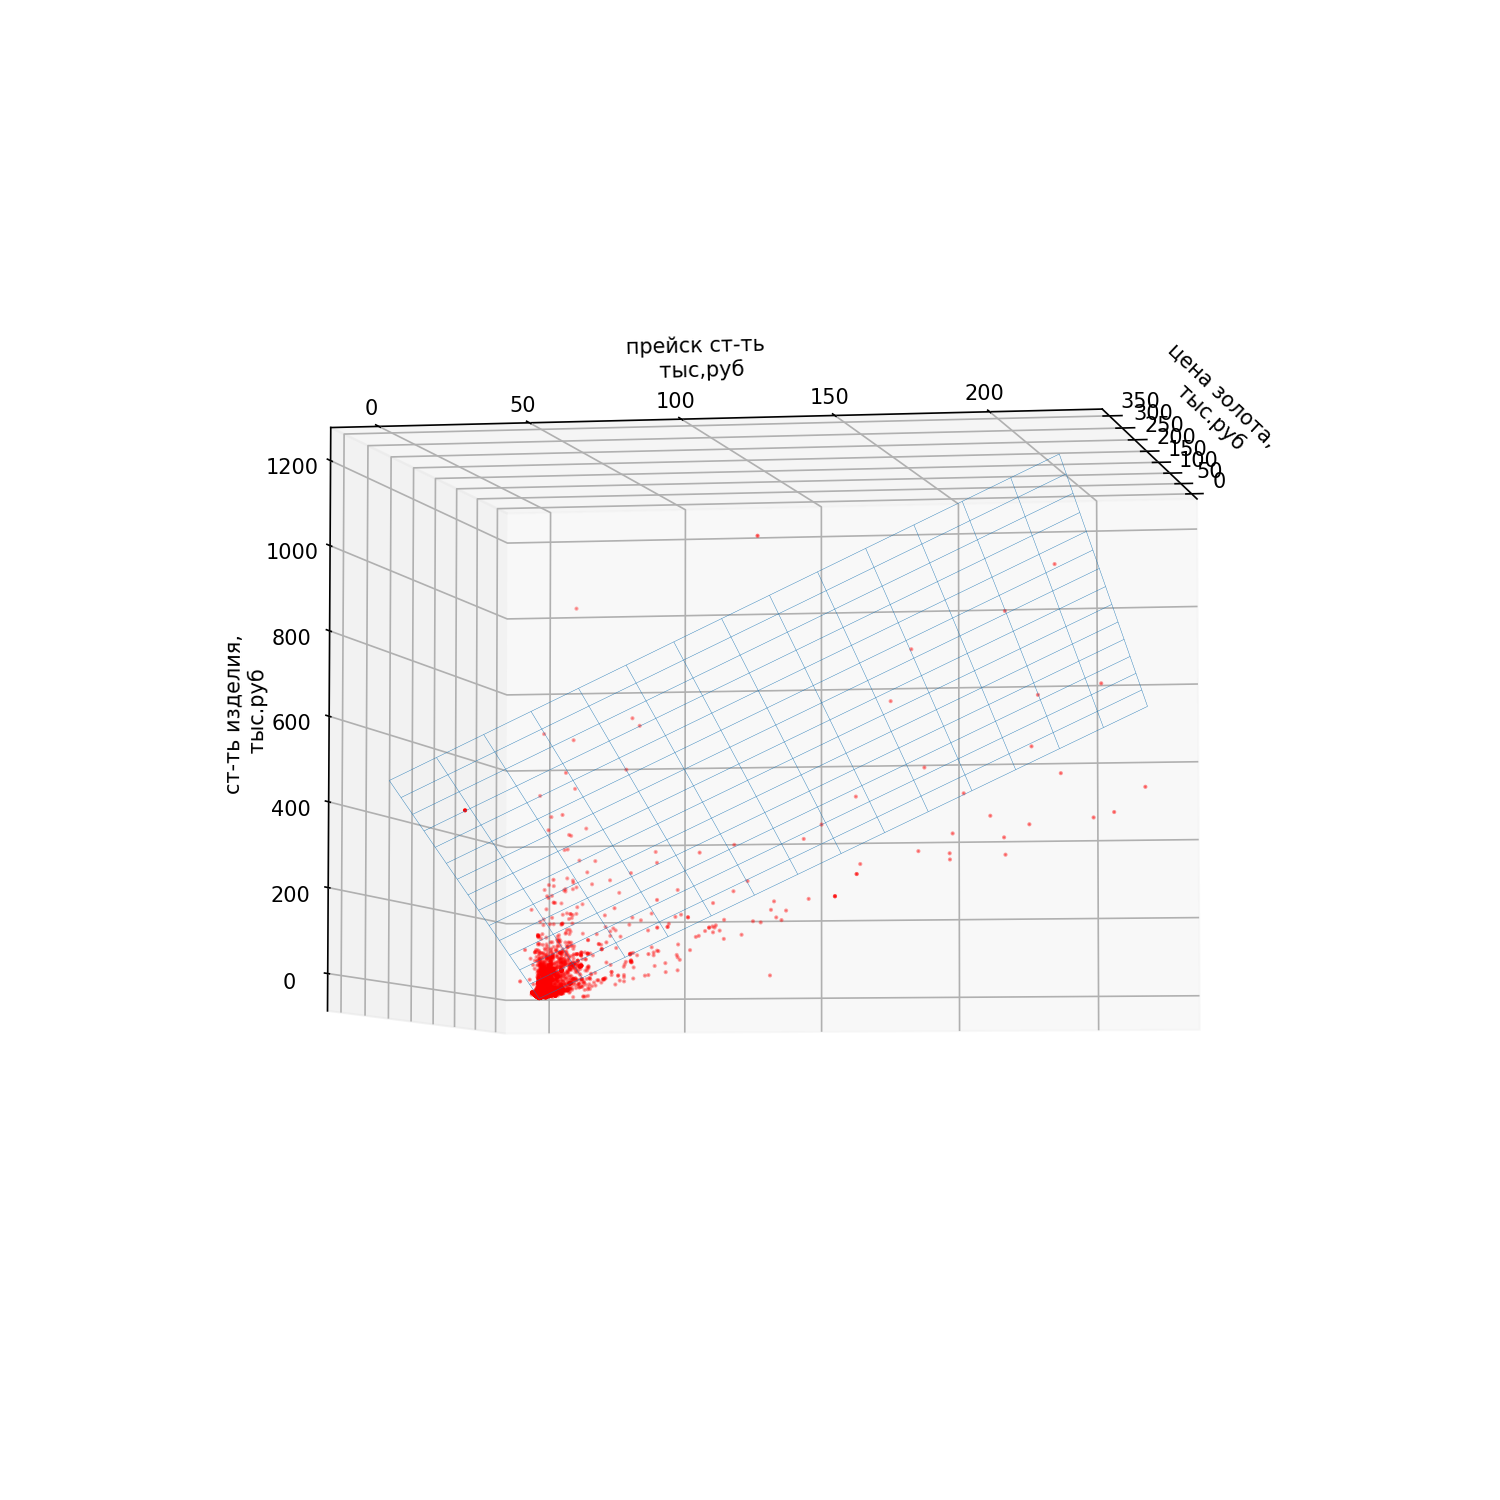

In [40]:
pricesurf(data_kdm)

In [35]:
ax.plot_wireframe?

In [ ]:
#Курс доллара и биржевая цена золота на 03-12-2021
dollar_rate = 73.66
gold_rate = 4191.05
data['prcost_rub'] = data.prcost*dollar_rate
data['gold_rub'] = data.weight*0.585*gold_rate
pd.options.display.float_format ="{:.2f}".format
#нахождение коэффициентов 
miuz = linear_model.LinearRegression()
X_train = data.iloc[:,:].loc[:,['gold_rub','prcost_rub']].to_numpy()
Y_train = data.iloc[:,:].loc[:,'price'].to_numpy()
miuz.fit(X_train,Y_train)
A,B = miuz.coef_
C =  miuz.intercept_
#проверка
data['predict'] = miuz.predict(X_train)
data['bycoef'] = data.gold_rub*miuz.coef_[0] + data.prcost_rub*miuz.coef_[1]+miuz.intercept_
data['diff'] = data.predict-data.bycoef
#построение плоскости
x_val = np.linspace(0,20000,10)# np.arange(0, 20000,5000)
y_val = np.linspace(0,130000,10)
xx,yy = np.meshgrid(x_val,y_val)
zz = A*xx + B*yy + C/1000
#визуализация
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_wireframe(xx/1000, yy/1000, zz/1000 )
ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='red')
ax.set_xlabel('цена золота, \n тыс.руб')
ax.set_ylabel('прейск ст-ть \n тыс,руб')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
#ax.plot_surface(xx/1000, yy/1000, zz/1000)

<IPython.core.display.Javascript object>


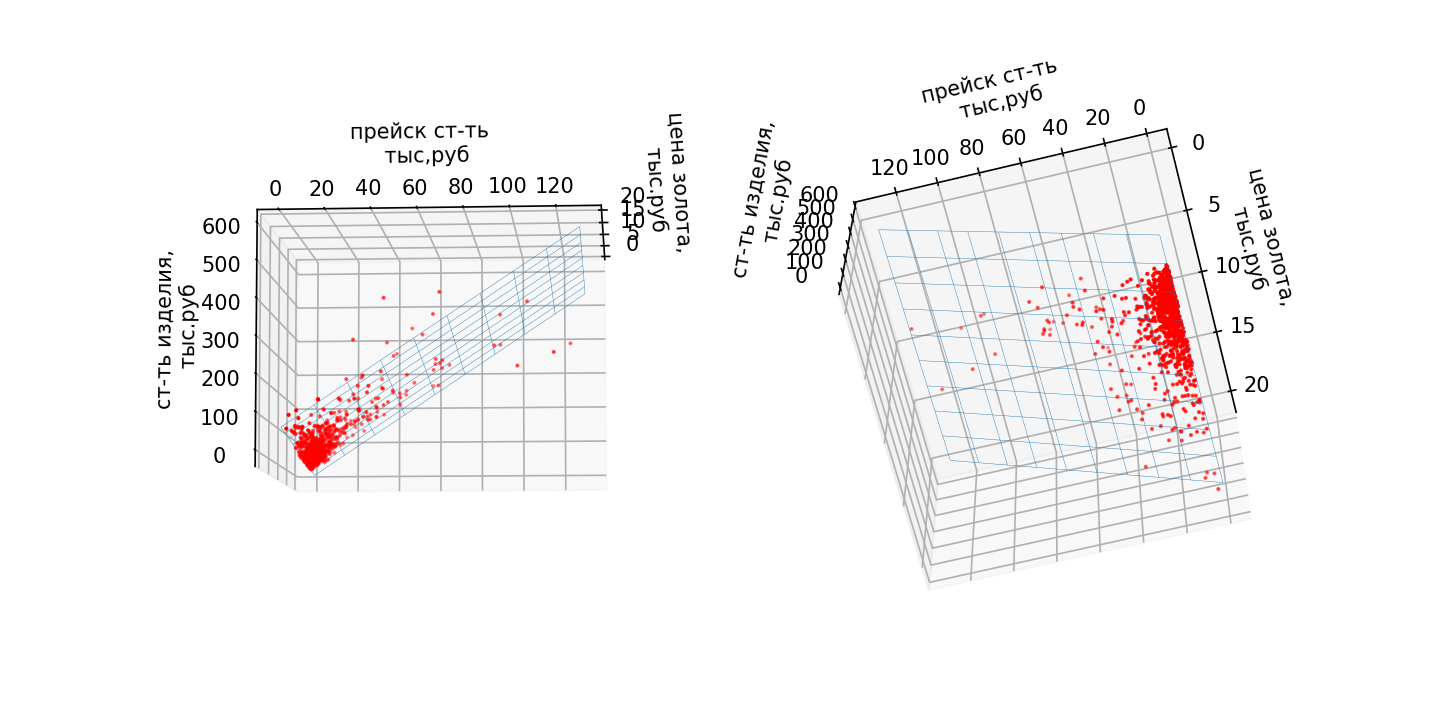

In [56]:

fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(xx/1000, yy/1000, zz/1000, linewidth=0.2 )
ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='red')
ax.set_xlabel('цена золота, \n тыс.руб')
ax.set_ylabel('прейск ст-ть \n тыс,руб')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
ax.view_init(-7,4)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(xx/1000, yy/1000, zz/1000, linewidth=0.2 )
ax.scatter3D(data.gold_rub/1000,data.prcost_rub/1000,data.price/1000,s=1,c='red')
ax.set_xlabel('цена золота, \n тыс.руб')
ax.set_ylabel('прейск ст-ть \n тыс,руб')
ax.set_zlabel('ст-ть изделия,\n тыс.руб')
ax.view_init(-66,-166)


In [ ]:
# ==============
# Second subplot
# ==============
# set up the axes for the second plot

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

plt.show()